In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import os
import itertools
import time
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from torch.optim.lr_scheduler import (CosineAnnealingLR,
                                      CosineAnnealingWarmRestarts,
                                      StepLR,
                                      ExponentialLR)

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, auc, f1_score, precision_score, recall_score

In [18]:
import tqdm, re, sys
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import plot_confusion_matrix
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.callbacks import CSVLogger, ModelCheckpoint

In [19]:
data_train = pd.read_csv('/content/drive/MyDrive/project/model_line/band/train_band_line.csv', header=None)
data_test = pd.read_csv('/content/drive/MyDrive/project/model_line/band/valid_band_line.csv', header=None)
data_val= pd.read_csv('/content/drive/MyDrive/project/model_line/band/test_band_line.csv', header=None)

In [20]:
arr = np.array([])

for i in range(1,101):
  for j in range(240):
    arr = np.append(arr, np.array([i]))

In [21]:
arr_t = np.array([])

for i in range(1,101):
  for j in range(60):
    arr_t = np.append(arr_t, np.array([i]))

In [22]:
arr_v = np.array([])

for i in range(1,101):
  for j in range(60):
    arr_v = np.append(arr_v, np.array([i]))

In [23]:
data_train[256]=arr
data_test[256]=arr_t
data_val[256]=arr_v
data_val

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,-0.013974,-0.011168,-0.009118,-0.008067,-0.008125,-0.009210,-0.011005,-0.012983,-0.014471,-0.014771,...,0.009824,0.013030,0.016239,0.019380,0.022418,0.025327,0.028062,0.030516,0.032514,1.0
1,-0.168748,-0.165213,-0.162149,-0.159616,-0.157617,-0.156088,-0.154895,-0.153851,-0.152741,-0.151345,...,-0.109266,-0.106187,-0.103433,-0.101427,-0.100452,-0.100579,-0.101653,-0.103329,-0.105151,1.0
2,-0.065523,-0.063387,-0.062618,-0.063184,-0.064857,-0.067233,-0.069777,-0.071909,-0.073104,-0.072994,...,-0.104863,-0.102909,-0.101926,-0.101481,-0.101056,-0.100197,-0.098638,-0.096375,-0.093669,1.0
3,0.517435,0.633848,0.709706,0.733996,0.703265,0.622346,0.503432,0.363695,0.221988,0.095392,...,-0.067902,-0.046360,-0.023911,-0.006614,0.002560,0.003524,-0.001689,-0.009950,-0.018044,1.0
4,-0.069052,-0.066942,-0.064951,-0.062974,-0.060851,-0.058435,-0.055658,-0.052576,-0.049378,-0.046363,...,-0.135559,-0.138471,-0.142558,-0.147015,-0.150950,-0.153535,-0.154163,-0.152557,-0.148830,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.004594,0.009590,0.017135,0.025880,0.034416,0.041620,0.046867,0.050103,0.051777,0.052674,...,0.016083,-0.009705,-0.032355,-0.052129,-0.069386,-0.084460,-0.097612,-0.109031,-0.118868,100.0
5996,0.017135,0.017694,0.019432,0.022356,0.026302,0.030971,0.035976,0.040891,0.045291,0.048799,...,0.044268,0.089211,0.134152,0.171846,0.194955,0.197629,0.176948,0.133840,0.073184,100.0
5997,-0.061678,-0.060521,-0.059365,-0.058206,-0.057080,-0.056067,-0.055283,-0.054843,-0.054816,-0.055175,...,-0.050592,-0.052317,-0.052018,-0.049965,-0.046587,-0.042433,-0.038139,-0.034393,-0.031913,100.0
5998,-0.039287,-0.039374,-0.039054,-0.038510,-0.037933,-0.037494,-0.037327,-0.037532,-0.038153,-0.039167,...,-0.060069,-0.061489,-0.061986,-0.061385,-0.059834,-0.057803,-0.055972,-0.055062,-0.055631,100.0


In [24]:
y_train = to_categorical(data_train[256])
y_test = to_categorical(data_test[256])
y_val = to_categorical(data_val[256])
y_train[:241]

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [25]:
data_train.drop([256], axis=1, inplace=True)
data_test.drop([256], axis=1, inplace=True)
data_val.drop([256], axis=1, inplace=True)
data_train

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-0.031820,-0.015874,-0.001172,0.011249,0.020713,0.026974,0.030190,0.030831,0.029559,0.027102,...,-0.034745,-0.035003,-0.034647,-0.033418,-0.031305,-0.028545,-0.025565,-0.022868,-0.020891,-0.019891
1,-0.019872,-0.020594,-0.021637,-0.022515,-0.022798,-0.022202,-0.020644,-0.018236,-0.015233,-0.011971,...,-0.074461,-0.072854,-0.070401,-0.067539,-0.064716,-0.062285,-0.060443,-0.059208,-0.058448,-0.057940
2,-0.057454,-0.056822,-0.055984,-0.054985,-0.053945,-0.052999,-0.052250,-0.051733,-0.051414,-0.051213,...,-0.062595,-0.059447,-0.057278,-0.056011,-0.055424,-0.055246,-0.055239,-0.055275,-0.055352,-0.055577
3,-0.056099,-0.057035,-0.058395,-0.060043,-0.061694,-0.062967,-0.063465,-0.062887,-0.061116,-0.058272,...,-0.071648,-0.071806,-0.071741,-0.071302,-0.070367,-0.068861,-0.066758,-0.064085,-0.060936,-0.057487
4,0.053295,0.053439,0.055066,0.059409,0.067278,0.078961,0.094216,0.112361,0.132422,0.153321,...,0.138507,0.150072,0.164082,0.180535,0.199168,0.219491,0.240843,0.262473,0.283635,0.303673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,0.043512,0.020932,0.001382,-0.014947,-0.027957,-0.037670,-0.044270,-0.048123,-0.049775,-0.049906,...,-0.021698,-0.020100,-0.018824,-0.018132,-0.018247,-0.019303,-0.021303,-0.024082,-0.027314,-0.030559
23996,-0.076867,-0.083002,-0.088128,-0.091454,-0.092582,-0.091623,-0.089189,-0.086281,-0.084051,-0.083490,...,-0.017889,-0.019352,-0.019054,-0.016308,-0.011295,-0.004783,0.002224,0.008807,0.014368,0.018726
23997,0.022090,0.024929,0.027786,0.031100,0.035075,0.039622,0.044402,0.048933,0.052740,0.055510,...,-0.047767,-0.053679,-0.057318,-0.059515,-0.061043,-0.062554,-0.064528,-0.067243,-0.070758,-0.074902
23998,-0.079288,-0.083358,-0.086464,-0.087995,-0.087513,-0.084880,-0.080336,-0.074488,-0.068211,-0.062467,...,-0.067610,-0.066882,-0.067113,-0.068424,-0.070704,-0.073600,-0.076563,-0.078930,-0.080050,-0.079413


In [26]:
X_train=data_train.values
X_test=data_test.values
X_val=data_val.values

In [27]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(24000, 256)
(6000, 256)
(6000, 256)
(24000, 101)
(6000, 101)
(6000, 101)


In [28]:
# X_train = X_train.reshape(1, 256, 24000)
# X_test = X_test.reshape(1, 256, 6000)
# X_val = X_val.reshape(1, 256, 6000)
X_train = X_train.reshape(24000, 256, 1)
X_test = X_test.reshape(6000, 256, 1)
X_val = X_val.reshape(6000, 256, 1)
X_train.shape, X_test.shape, X_val.shape

((24000, 256, 1), (6000, 256, 1), (6000, 256, 1))

In [29]:
from keras.layers import Input, Embedding, GRU, LSTM, SimpleRNN, MaxPooling1D, GlobalMaxPool1D, CuDNNGRU
from keras.layers import Dropout, Dense, Activation, Flatten, Conv1D, SpatialDropout1D
from keras.models import Sequential

model = Sequential()
model.add(SimpleRNN(units=100, return_sequences=True, input_shape=(256,1))) #shape[1]=열
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(SimpleRNN(units=100, return_sequences=True))
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(SimpleRNN(units=100, return_sequences=True))


model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(101, activation='softmax'))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 256, 100)          10200     
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 256, 50)           7550      
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 256, 100)          15100     
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 256, 50)           7550      
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 256, 100)          15100     
                                                                 
 flatten_1 (Flatten)         (None, 25600)             0         
                                                                 
 dropout_1 (Dropout)         (None, 25600)            

In [30]:
history = model.fit(X_train, y_train, batch_size = 1024, epochs = 500, verbose = 1, validation_data=(X_val, y_val))

Epoch 1/500
24/24 [==============================] - 30s 1s/step - loss: 0.0099 - accuracy: 0.0181 - val_loss: 0.0098 - val_accuracy: 0.0340
Epoch 2/500
24/24 [==============================] - 26s 1s/step - loss: 0.0098 - accuracy: 0.0420 - val_loss: 0.0097 - val_accuracy: 0.0642
Epoch 3/500
24/24 [==============================] - 26s 1s/step - loss: 0.0096 - accuracy: 0.0882 - val_loss: 0.0096 - val_accuracy: 0.0895
Epoch 4/500
24/24 [==============================] - 27s 1s/step - loss: 0.0093 - accuracy: 0.1523 - val_loss: 0.0094 - val_accuracy: 0.1385
Epoch 5/500
24/24 [==============================] - 26s 1s/step - loss: 0.0089 - accuracy: 0.2059 - val_loss: 0.0091 - val_accuracy: 0.1963
Epoch 6/500
24/24 [==============================] - 26s 1s/step - loss: 0.0084 - accuracy: 0.2732 - val_loss: 0.0091 - val_accuracy: 0.2062
Epoch 7/500
24/24 [==============================] - 26s 1s/step - loss: 0.0079 - accuracy: 0.3431 - val_loss: 0.0085 - val_accuracy: 0.2743
Epoch 8/500
2

In [31]:
model.evaluate(X_test, y_test)

188/188 [==============================] - 17s 91ms/step - loss: 0.0012 - accuracy: 0.9145


[0.0012278290232643485, 0.9144999980926514]

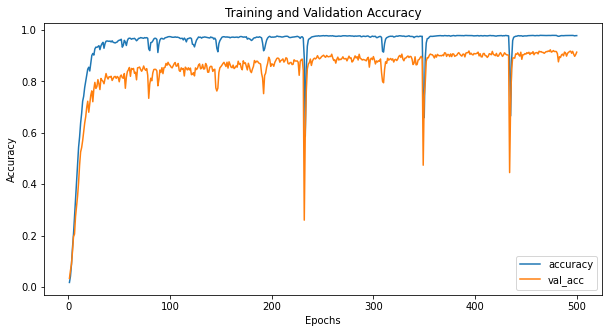

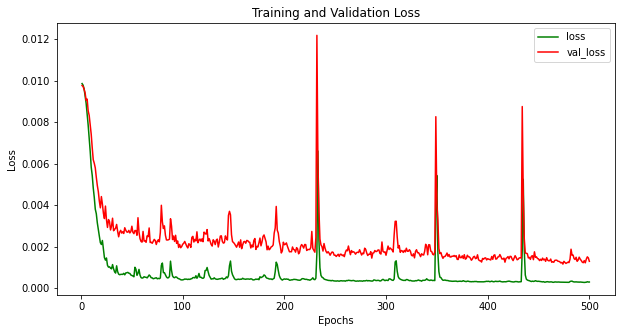

In [32]:
history=history.history
epochs = range(1, len(history['loss']) + 1)
acc = history['accuracy']
loss = history['loss']
val_acc = history['val_accuracy']
val_loss = history['val_loss']

plt.figure(figsize=(10, 5))
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='val_acc')
plt.legend()

plt.figure(figsize=(10, 5))
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, label='loss', color='g')
plt.plot(epochs, val_loss, label='val_loss', color='r')
plt.legend()

In [33]:
from tensorflow.python.keras.models import load_model
model.save('RNNband.h5')

In [34]:
from google.colab import files
files.download('RNNband.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>